In [1]:
pip install yfinance


In [3]:
import yfinance as yf #Downloads the historical data of Stock market
import pandas as pd #Used fo data manipulation and analysis
import numpy as np #Provides mathametical functions
import matplotlib.pyplot as plt #used for visulization of dataset
from sklearn.model_selection import train_test_split #Splits data into training and testing sets
from sklearn.ensemble import RandomForestRegressor #Ml model for regression
from sklearn.metrics import mean_squared_error, r2_score#It evaluates model performance

In [6]:
ticker='AAPL' #We will use apple dataset
data=yf.download(ticker,start='2010-01-01',end='2023-01-01') #downloading dataset of Apple in specific year range
data.head() #print few rows of dataset

<ipython-input-6-1203483942>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start='2010-01-01',end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431897,6.446623,6.382908,6.414465,493729600
2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
2010-01-06,6.340533,6.468564,6.333921,6.443018,552160000
2010-01-07,6.328810,6.371487,6.282827,6.363974,477131200
2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [11]:
data.isnull().sum() #Finds sum of null values in a dataset

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
Next Close,,0


In [12]:
data.shape #print total rows and columns in dataset

(3271, 6)

In [13]:
data.describe() #summarize the stats of a dataset

Price,Close,High,Low,Open,Volume,Next Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
count,3271.000000,3271.000000,3271.000000,3271.000000,3.271000e+03,3271.000000
mean,48.812822,49.337303,48.249988,48.790114,2.563255e+08,48.850070
std,47.199187,47.777970,46.579069,47.171981,2.225768e+08,47.213804
min,5.771905,5.890619,5.717809,5.781522,3.519590e+07,5.771905
25%,16.413130,16.600475,16.275202,16.406980,1.023724e+08,16.414901
50%,27.034899,27.243755,26.901149,27.087754,1.666740e+08,27.037430
75%,54.174290,54.875725,53.809303,54.375627,3.457554e+08,54.293343
max,178.645630,179.558473,175.809076,179.254206,1.880998e+09,178.645630


In [14]:
data.info() #give information about each variable in dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3271 entries, 2010-01-04 to 2022-12-29
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3271 non-null   float64
 1   (High, AAPL)    3271 non-null   float64
 2   (Low, AAPL)     3271 non-null   float64
 3   (Open, AAPL)    3271 non-null   float64
 4   (Volume, AAPL)  3271 non-null   int64  
 5   (Next Close, )  3271 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [7]:
#Each row contain tommorrow's Closing price in the 'New Close' variable
data['Next Close']=data['Close'].shift(-1)
data=data[:-1] #remove the last column from the rest of columns

In [8]:
features=['Open','High','Low','Volume','Close'] #festures from which we will train data
X=data[features] #storing feature or input
Y=data['Next Close'] #storing label or output

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X ,Y, test_size=0.2,random_state=42) #train and test features and labels of dataset


In [19]:
X_train.head() #prints features columns

Price,Open,High,Low,Volume,Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2013-02-25,13.841429,13.880160,13.497413,372579200,13.504428
2021-10-08,141.161670,141.308677,139.720943,58773200,140.054169
2014-01-27,17.097710,17.244731,16.963432,554878800,17.111074
2014-01-30,15.620343,15.743432,15.438821,678501600,15.534554
2021-11-18,150.868750,155.737059,150.220946,137827700,154.951843


In [20]:
Y_train.head() #print label's columns

,Next Close
Date,
2013-02-25,13.692597
2021-10-08,139.965958
2014-01-27,15.743437
2014-01-30,15.560043
2021-11-18,157.582321


In [16]:
#Model for training a data
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)


RandomForestRegressor(random_state=42)

In [17]:
y_predict=model.predict(X_test) #prediction

In [18]:
#Calculates the performance of dataset
print(f"Mean Squared Error: {mean_squared_error(Y_test,y_predict):2f}")
print(f"R2: {r2_score(Y_test,y_predict):2f}")

Mean Squared Error: 1.780247
R2: 0.999224


In [21]:
results=pd.DataFrame({'Actual': Y_test,'Predicted': y_predict}, index=Y_test.index)



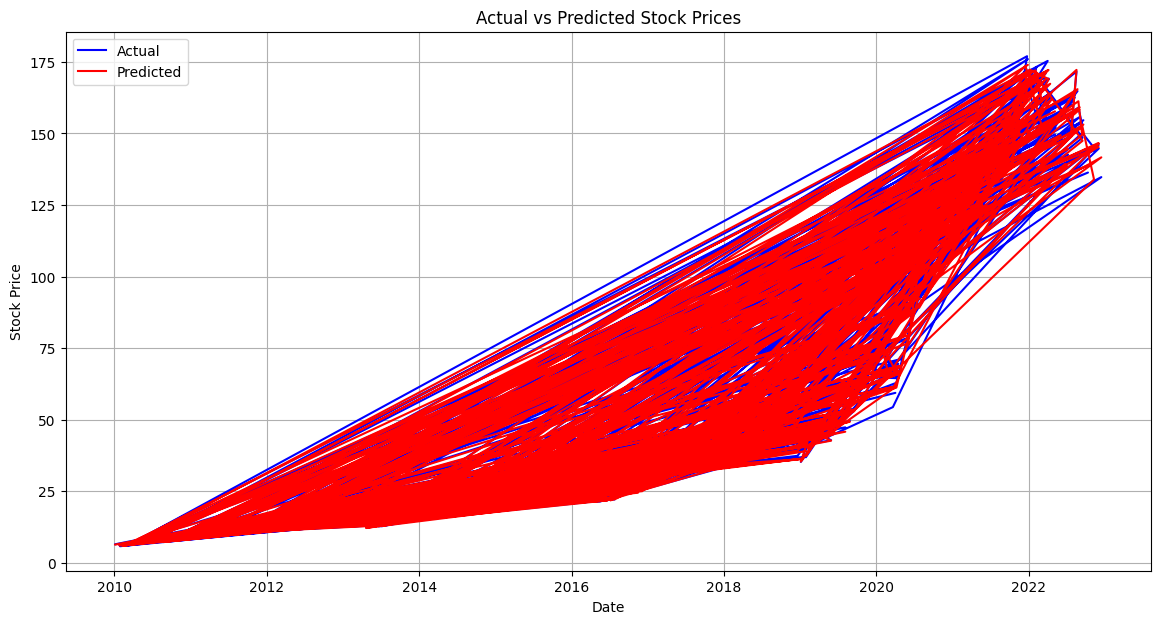

In [22]:
#Complete plot of data
plt.figure(figsize=(14,7))
plt.plot(results['Actual'], label='Actual', color='blue')
plt.plot(results['Predicted'], label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()